# Tutorial

Simulate genes under various levels of selection coefficient, with different demographic models (1,2,3-epoch) and with selection time between 15kya and 25 kya. Each scenario is run 3 times.

In [ ]:
# bash generate_training_data.sh

In [1]:
import os
import gzip

import numpy as np
import scipy.stats

import skimage.transform
from keras import models, layers, optimizers, regularizers
from keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import pymc3
import pydot

Using TensorFlow backend.


In [2]:
%run -i ImaGene.py

For the first analysis, we seek to understand the impact of sorting images on the quantification. 
We use 1-epoch model for this first analysis.
Results will be visualised by linear regression plots.

Read simulations and store in object.

In [3]:
myfile = ImaFile(simulations_folder='/home/mfumagal/Data/ImaGene/Simulations2.Epoch1', nr_samples=128, model_name='Marth-1epoch-CEU')

In [4]:
mypop = myfile.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=100)

(optional) Save description of files in .json file

In [5]:
import json

with open('/home/mfumagal/Data/ImaGene/simulations2.Epoch1.json', 'w') as fp:
    json.dump(mypop.description, fp, sort_keys=True, allow_nan=False, indent=4)

(optional) Save the original data object.

In [6]:
import _pickle as pickle

In [ ]:
# to save, create folder
#os.mkdir('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1')

In [7]:
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','wb') as fp:
    pickle.dump(mypop, fp)

In [ ]:
# to load:
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)

Explore the object (with nrepl=20 we have 40100 images).

In [8]:
mypop.summary()

An object of 4100 images
Rows: min 128, max 128, mean 128.000000, std 0.000000
Columns: min 187, max 477, mean 325.228780, std 36.905903


0

In [ ]:
print(len(mypop.data))
print(mypop.data[0].shape)
print(mypop.data[0].dtype)

Plot one image for no selection, at 1% and at 2%

In [ ]:
mypop.plot(0)
print(mypop.description[0])

In [ ]:
idx = np.where(mypop.target==0)[0][0]
mypop.plot(idx)
print(mypop.description[idx])
mypop.data[idx].shape

In [ ]:
idx = np.where(mypop.target==400)[0][0]
mypop.plot(idx)
print(mypop.description[idx])
mypop.data[idx].shape

Switch to major/minor allele polarisation.

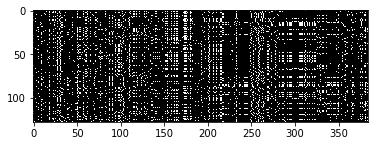

0

In [9]:
mypop.majorminor()
mypop.plot(0)

Filter out rare variants.

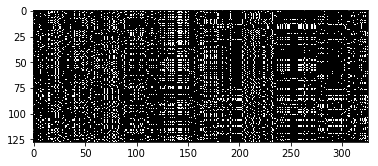

(128, 326, 1)

In [10]:
mypop.filter_freq(0.01)
mypop.plot(0)
mypop.data[0].shape

In [ ]:
mypop.summary()

In [ ]:
# optional
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','wb') as fp:
    pickle.dump(mypop, fp)

Sort images using different orderings.
Then resize to same dimensions 128x128.
Then convert them to float numpy arrays and shuffle using the same order.

In [11]:
shuffle_index = np.random.permutation(len(mypop.data))

In [13]:
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','wb') as fp:
    pickle.dump(mypop, fp)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (4100, 128, 128, 1) and target with length 4100 and 41 classes.


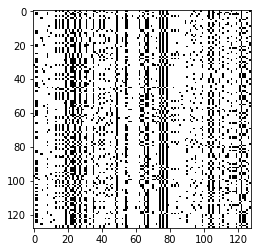

In [14]:
## NONE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.resize((128, 128))
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_sortednone','wb') as fp:
    pickle.dump(mypop, fp)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (4100, 128, 128, 1) and target with length 4100 and 41 classes.


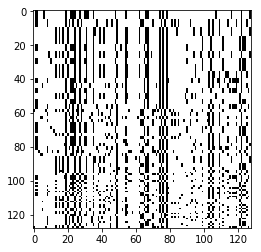

In [15]:
## ROWS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_freq')
mypop.resize((128, 128))
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_sortedrowsfreq','wb') as fp:
    pickle.dump(mypop, fp)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (4100, 128, 128, 1) and target with length 4100 and 41 classes.


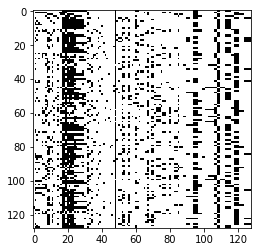

In [16]:
## COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('cols_freq')
mypop.resize((128, 128))
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_sortedcolsfreq','wb') as fp:
    pickle.dump(mypop, fp)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (4100, 128, 128, 1) and target with length 4100 and 41 classes.


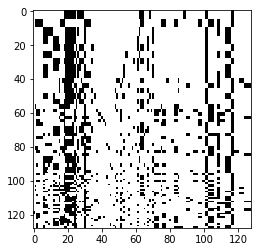

In [17]:
## ROWS+COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_freq')
mypop.sort('cols_freq')
mypop.resize((128, 128))
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_sortedrowscolsfreq','wb') as fp:
    pickle.dump(mypop, fp)

Converting to numpy array.
Converting to float32.
Converting to [0,1].
Flipping values.
A numpy array with dimensions (4100, 128, 128, 1) and target with length 4100 and 41 classes.


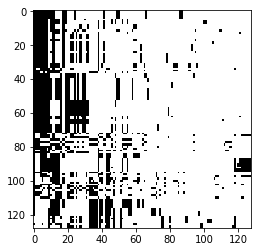

In [18]:
## ROWS+COLS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.sort('cols_distance_top')
mypop.resize((128, 128))
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
mypop.plot(0)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_sortedrowscolsdist','wb') as fp:
    pickle.dump(mypop, fp)

In [ ]:
## ROWS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowsdist','wb') as fp:
    pickle.dump(mypop, fp)

In [ ]:
## COLS DISTANCE
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('cols_distance_top')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedcolsdist','wb') as fp:
    pickle.dump(mypop, fp)

In [ ]:
## ROWS DISTANCE + COLS FREQ
# load fresh object
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered','rb') as fp:
    mypop = pickle.load(fp)
# sort and resize
mypop.sort('rows_distance_top')
mypop.sort('cols_freq')
mypop.resize((128, 128))
mypop.plot(0)
# convert and shuffle
mypop.convert()
mypop.shuffle(shuffle_index)
# save
with open('/home/mfumagal/Data/ImaGene/Sorting_effect_Epoch1/mypop_majorminor_filtered_sortedrowsdistcolsfreq','wb') as fp:
    pickle.dump(mypop, fp)